### Import Libraries 

In [94]:
import warnings
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
sb.set_style(style='whitegrid')
%matplotlib inline 
warnings.filterwarnings('ignore')

### Loading data

In [102]:
#put on the name of columns on the dataframe 
colnames=['price', 'production_year', 'mileage', 'fuel_type', 'mark', 'model', 'fiscal_power', 'sector', 'type', 'city'] 
# read the csv file as a dataframe
df = pd.read_csv("../data/raw_used_cars.csv", sep=",", header=None,names=colnames)
# let's get some simple vision on our dataset
df.head()

,price,production_year,mileage,fuel_type,mark,model,fiscal_power,sector,type,city
0,135 000 DH,Année-Modèle:2013,Kilométrage:160 000 - 169 999,Type de carburant:Diesel,Marque:Peugeot,Modèle:508,Puissance fiscale:-,-,"Type:Voitures, Offre",Temara
1,53 000 DH,Année-Modèle:2008,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Renault,Modèle:Clio,Puissance fiscale:-,-,"Type:Voitures, Offre",Safi
2,59 000 DH,Année-Modèle:2007,Kilométrage:180 000 - 189 999,Type de carburant:Diesel,Marque:Citroen,Modèle:C3,Puissance fiscale:6 CV,Secteur:oued_fes,"Type:Voitures, Offre",Fès
3,88 000 DH,Année-Modèle:2010,Kilométrage:35 000 - 39 999,Type de carburant:Diesel,Marque:Mercedes-Benz,Modèle:220,Puissance fiscale:-,-,"Type:Voitures, Offre",Nador
4,60 000 DH,Année-Modèle:2009,Kilométrage:130 000 - 139 999,Type de carburant:Essence,Marque:Ford,Modèle:Fiesta,Puissance fiscale:7 CV,Secteur:saies,"Type:Voitures, Offre",Fès


### Preprocessing and Cleaning Data 

##### PRICE

In [104]:
# PRICE COLUMN CLEANING 
# remove thos rows doesn't contain the price value
df = df[df.price.str.contains("DH") == True]
# remove the 'DH' caracters from the price values in the right 
df.price = df.price.apply(lambda x: x.rstrip('DH'))
# remove the space 
df.price = df.price.str.replace(" ","")
# change it to integer value
df.price = pd.to_numeric(df.price, errors = 'coerce', downcast= 'integer')
df.price

0       135000
1        53000
2        59000
3        88000
4        60000
         ...  
8664    123000
8665     97000
8666     96000
8667     41000
8668     90000
Name: price, Length: 8664, dtype: int32

##### PRODUCTION YEAR 

In [108]:
df.production_year.unique()

array(['Année-Modèle:2013', 'Année-Modèle:2008', 'Année-Modèle:2007',
       'Année-Modèle:2010', 'Année-Modèle:2009', 'Année-Modèle:2006',
       'Année-Modèle:2003', 'Année-Modèle:2014', 'Année-Modèle:2001',
       'Année-Modèle:2015', 'Année-Modèle:1993', 'Année-Modèle:2002',
       'Année-Modèle:1999', 'Année-Modèle:1995', 'Année-Modèle:1996',
       'Année-Modèle:2012', 'Année-Modèle:2000', 'Année-Modèle:2011',
       'Année-Modèle:1987', 'Année-Modèle:2005', 'Année-Modèle:1988',
       'Année-Modèle:2004', 'Année-Modèle:1998', 'Année-Modèle:1991',
       'Année-Modèle:1997', 'Année-Modèle:1992', 'Année-Modèle:2016',
       'Année-Modèle:1986', 'Année-Modèle:2017', 'Année-Modèle:1990',
       'Année-Modèle:1989', 'Année-Modèle:1984', 'Année-Modèle:-',
       'Année-Modèle:1994', 'Année-Modèle:1980 ou plus ancien',
       'Année-Modèle:1985', 'Année-Modèle:1983', 'Année-Modèle:2018',
       'Année-Modèle:1981', 'Année-Modèle:1982', 'Année-Modèle: -'],
      dtype=object)

In [110]:
## YEAR MODEL 
# remove those rows that doesn't contain the year_model value
df = df[df.production_year.str.contains("Année-Modèle") == True]
# remove the 'Année-Modèle:' from the year_model on the left 
df.production_year = df.production_year.map(lambda s: s.lstrip('Année-Modèle:'))
# remove 'ou plus ancien' from the year model o the right
df._year=df.production_year.apply(lambda s:s.rstrip('ou plus ancien'))
# df.year_model = df.year_model.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the model_year not set
df = df[df.production_year != ' -']
df = df[df.production_year != '']
# change it to integer value
df.production_year = pd.to_numeric(df.production_year, errors = 'coerce', downcast = 'integer')
df.production_year.unique()

array([2013., 2008., 2007., 2010., 2009., 2006., 2003., 2014., 2001.,
       2015., 1993., 2002., 1999., 1995., 1996., 2012., 2000., 2011.,
       1987., 2005., 1988., 2004., 1998., 1991., 1997., 1992., 2016.,
       1986., 2017., 1990., 1989., 1984., 1994.,   nan, 1985., 1983.,
       2018., 1981., 1982.])

##### MILEAGE

In [112]:
df.mileage.unique()

array(['Kilométrage:160 000 - 169 999', 'Kilométrage:35 000 - 39 999',
       'Kilométrage:180 000 - 189 999', 'Kilométrage:130 000 - 139 999',
       'Kilométrage:100 000 - 109 999', 'Kilométrage:10 000 - 14 999',
       'Kilométrage:250 000 - 299 999', 'Kilométrage:110 000 - 119 999',
       'Kilométrage:170 000 - 179 999', 'Kilométrage:65 000 - 69 999',
       'Kilométrage:85 000 - 89 999', 'Kilométrage:25 000 - 29 999',
       'Kilométrage:75 000 - 79 999', 'Kilométrage:120 000 - 129 999',
       'Kilométrage:30 000 - 34 999', 'Kilométrage:200 000 - 249 999',
       'Kilométrage:5 000 - 9 999', 'Kilométrage:0 - 4 999',
       'Kilométrage:20 000 - 24 999', 'Kilométrage:50 000 - 54 999',
       'Kilométrage:150 000 - 159 999', 'Kilométrage:80 000 - 84 999',
       'Kilométrage:300 000 - 349 999', 'Kilométrage: 120 000 - 129 999',
       'Kilométrage:55 000 - 59 999', 'Kilométrage:350 000 - 399 999',
       'Kilométrage:45 000 - 49 999', 'Kilométrage:15 000 - 19 999',
       'Kilomét

In [114]:
# remove thos rows doesn't contain the year_model value
df = df[df.mileage.str.contains("Kilométrage") == True]
# remove the 'Kilométrage:' string from the mileage feature 
df.mileage = df.mileage.map(lambda x: x.lstrip('Kilométrage:'))
df.mileage = df.mileage.map(lambda x: x.lstrip('Plus de '))
# remove those lines having the mileage values null or '-'
df = df[df.mileage != '-']
df.mileage = df.mileage.astype(str)
df.mileage

0       160 000 - 169 999
1         35 000 - 39 999
2       180 000 - 189 999
3         35 000 - 39 999
4       130 000 - 139 999
              ...        
8664      15 000 - 19 999
8665      65 000 - 69 999
8666      70 000 - 74 999
8667    150 000 - 159 999
8668      50 000 - 54 999
Name: mileage, Length: 8558, dtype: object

In [116]:
# we have only one value type that is equal to 500 000, all the other ones contain two values
df = df[df.mileage != '500 000']
# we will only take the maximum value from the milage ranges. you could take the minimum value.
df['mileage'] = df.mileage.apply(lambda s: s.split('-', 2)[1])
# remove spaces from the maxim & minim values 
df['mileage'] = df.mileage.str.replace(" ","")
#replace NaN values with 0 
df['mileage'] = df['mileage'].replace(np.nan, 0)
df.mileage = pd.to_numeric(df.mileage,errors = 'coerce', downcast = 'integer')
#show the new dataframe 
df.mileage

0       169999
1        39999
2       189999
3        39999
4       139999
         ...  
8664     19999
8665     69999
8666     74999
8667    159999
8668     54999
Name: mileage, Length: 8514, dtype: int32

#### FUEL TYPE 

In [128]:
df.fuel_type.value_counts()

fuel_type
Diesel        6110
Essence       2394
Electrique       3
LPG              2
Name: count, dtype: int64

In [132]:
# remove the 'Type de carburant:' string from the carburant_type feature
df.fuel_type = df.fuel_type.map(lambda x: x.lstrip('Type de carburant:'))
# remove the lines having the fuel_type not set
df = df[df.fuel_type != '-']
# delete LPG and Electrique 
df = df[(df.fuel_type =="Diesel")|(df.fuel_type == "Essence")]
# print
df.fuel_type.value_counts()

fuel_type
Diesel     6110
Essence    2394
Name: count, dtype: int64

<Axes: xlabel='fuel_type'>

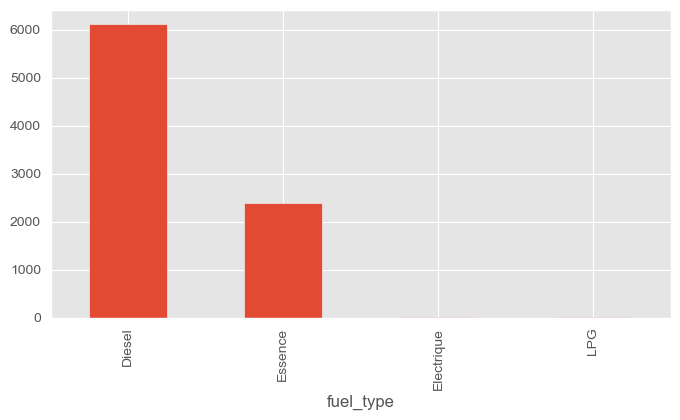

In [126]:
plt.style.use('ggplot')
df.fuel_type.value_counts().plot(kind='bar',figsize=(8, 4))

#### MARK & MODEL

In [53]:
df.mark.unique()

array(['Marque:Peugeot', 'Marque:Renault', 'Marque:Citroen',
       'Marque:Mercedes-Benz', 'Marque:Ford', 'Marque:Nissan',
       'Marque:Fiat', 'Marque:Skoda', 'Marque:Hyundai', 'Marque:Kia',
       'Marque:Dacia', 'Marque:Opel', 'Marque:Volkswagen', 'Marque:mini',
       'Marque:Seat', 'Marque:Isuzu', 'Marque:Honda', 'Marque:Mitsubishi',
       'Marque:Toyota', 'Marque:BMW', 'Marque:Chevrolet', 'Marque:Audi',
       'Marque:Suzuki', 'Marque:Ssangyong', 'Marque:lancia',
       'Marque:Jaguar', 'Marque:Volvo', 'Marque:Autres', 'Marque:BYD',
       'Marque:Daihatsu', 'Marque:Land Rover', 'Marque:Jeep',
       'Marque:Chery', 'Marque:Alfa Romeo', 'Marque:Bentley',
       'Marque:Daewoo', 'Marque:Hummer', 'Marque:Mazda',
       'Marque:Chrysler', 'Marque:Maserati', 'Marque:Cadillac',
       'Marque:Dodge', 'Marque:Rover', 'Marque:Porsche', 'Marque:GMC',
       'Marque:Infiniti', 'Marque:Changhe', 'Marque:Geely',
       'Marque:Zotye', 'Marque:UFO', 'Marque:Foton', 'Marque:Pontiac',
     

In [138]:
# remove the 'Marque:' string from the mark feature
df['mark'] = df['mark'].apply(lambda x: x.replace('Marque:', ''))
#remove empty lines 
df = df[df.mark != '-']
# remove the 'Modèle:' string from model feature 
df['model'] = df['model'].map(lambda x: x.replace('Modèle:', ''))
df = df[df.model != '-']
df.mark

0             Peugeot
1             Renault
2             Citroen
3       Mercedes-Benz
4                Ford
            ...      
8663             Fiat
8664          Hyundai
8665          Citroen
8667       Volkswagen
8668          Peugeot
Name: mark, Length: 8496, dtype: object

In [140]:
df.mark.unique()

array(['Peugeot', 'Renault', 'Citroen', 'Mercedes-Benz', 'Ford', 'Nissan',
       'Fiat', 'Skoda', 'Hyundai', 'Kia', 'Dacia', 'Opel', 'Volkswagen',
       'mini', 'Seat', 'Isuzu', 'Honda', 'Mitsubishi', 'Toyota', 'BMW',
       'Chevrolet', 'Audi', 'Suzuki', 'Ssangyong', 'lancia', 'Jaguar',
       'Volvo', 'Autres', 'BYD', 'Daihatsu', 'Land Rover', 'Jeep',
       'Chery', 'Alfa Romeo', 'Bentley', 'Daewoo', 'Hummer', 'Mazda',
       'Chrysler', 'Maserati', 'Cadillac', 'Dodge', 'Rover', 'Porsche',
       'GMC', 'Infiniti', 'Changhe', 'Geely', 'Zotye', 'UFO', 'Foton',
       'Pontiac', 'Acura', 'Lexus'], dtype=object)

In [142]:
df.model.value_counts()

model
Logan       313
Clio        260
Kangoo      227
Uno         212
Megane      195
           ... 
Avenger       1
TALISMAN      1
Fox           1
F3            1
X1            1
Name: count, Length: 485, dtype: int64

#### FISCAL POWER

In [144]:
df.fiscal_power.unique()

array(['Puissance fiscale:-', 'Puissance fiscale:6 CV',
       'Puissance fiscale:7 CV', 'Puissance fiscale:20 CV',
       'Puissance fiscale:5 CV', 'Puissance fiscale:8 CV',
       'Puissance fiscale:9 CV', 'Puissance fiscale:10 CV',
       'Puissance fiscale:4 CV', 'Puissance fiscale:12 CV',
       'Puissance fiscale:- ', 'Puissance fiscale:17 CV',
       'Puissance fiscale:28 CV', 'Puissance fiscale:11 CV',
       'Puissance fiscale:21 CV', 'Puissance fiscale:26 CV',
       'Puissance fiscale:13 CV', 'Puissance fiscale:24 CV',
       'Puissance fiscale:23 CV', 'Puissance fiscale:29 CV',
       'Puissance fiscale:34 CV', 'Puissance fiscale:18 CV',
       'Puissance fiscale:31 CV', 'Puissance fiscale:16 CV',
       'Puissance fiscale:15 CV', 'Puissance fiscale:39 CV',
       'Puissance fiscale:19 CV', 'Puissance fiscale:14 CV',
       'Puissance fiscale:Plus de 48 CV', 'Puissance fiscale:40 CV'],
      dtype=object)

In [146]:
df.fiscal_power.value_counts()

fiscal_power
Puissance fiscale:-                5584
Puissance fiscale:6 CV             1007
Puissance fiscale:8 CV              688
Puissance fiscale:7 CV              488
Puissance fiscale:9 CV              206
Puissance fiscale:11 CV             115
Puissance fiscale:5 CV              107
Puissance fiscale:10 CV             107
Puissance fiscale:12 CV             103
Puissance fiscale:4 CV               22
Puissance fiscale:17 CV              14
Puissance fiscale:13 CV              11
Puissance fiscale:21 CV               7
Puissance fiscale:-                   6
Puissance fiscale:20 CV               5
Puissance fiscale:23 CV               4
Puissance fiscale:Plus de 48 CV       3
Puissance fiscale:14 CV               3
Puissance fiscale:15 CV               2
Puissance fiscale:26 CV               2
Puissance fiscale:29 CV               2
Puissance fiscale:40 CV               2
Puissance fiscale:34 CV               1
Puissance fiscale:18 CV               1
Puissance fiscale:31 CV    

In [148]:
# remove the 'Puissance fiscale:' and 'CV' from the fiscal_power values 
df.fiscal_power = df.fiscal_power.map(lambda x: x.lstrip('Puissance fiscale:Plus de').rstrip(' CV'))
## A lot of fiscal power values are set to empty value. So we will be filling 
# them with the mode (6) as the most occurent fiscal pwer value. 
df.fiscal_power = df.fiscal_power.str.replace("-","6")
# convert all fiscal_power values to numerical ones 
df.fiscal_power = pd.to_numeric(df.fiscal_power, errors = 'coerce', downcast= 'integer')

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8501 entries, 0 to 8500
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         8501 non-null   int64 
 1   model_year    8501 non-null   int64 
 2   mileage       8501 non-null   int64 
 3   fuel_type     8501 non-null   object
 4   mark          8501 non-null   object
 5   model         8501 non-null   object
 6   fiscal_power  8501 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 465.0+ KB


### Handling Outliers 

In [164]:
# Define a function for plotting a boxplot
def boxplot(df,col):
    fig = plt.figure(figsize=(12,8))
    sb.set_style('darkgrid')
    sb.boxplot(data = df,x = col)
    plt.title(f'Plotting {col} Outliers')
    plt.show()
# Define a function to get the outliers 
def detect_outliers(df, col):
    Q1= df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

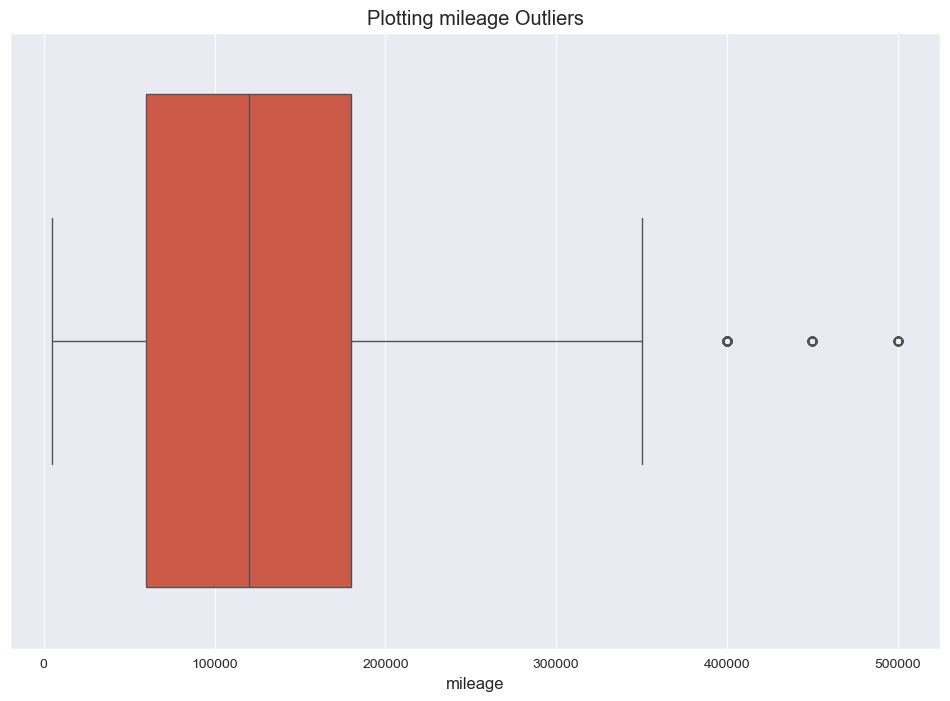

In [166]:
# plot the mileage box plot 
boxplot(df,'mileage')

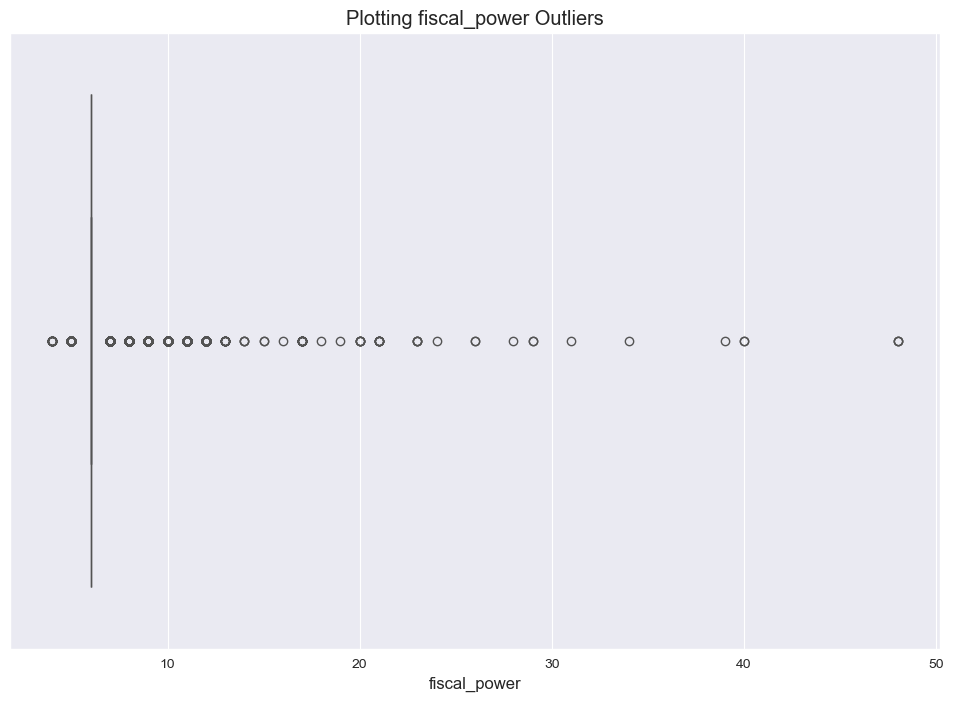

In [168]:
#plot the fiscal pwoer boxplot 
boxplot(df,'fiscal_power')

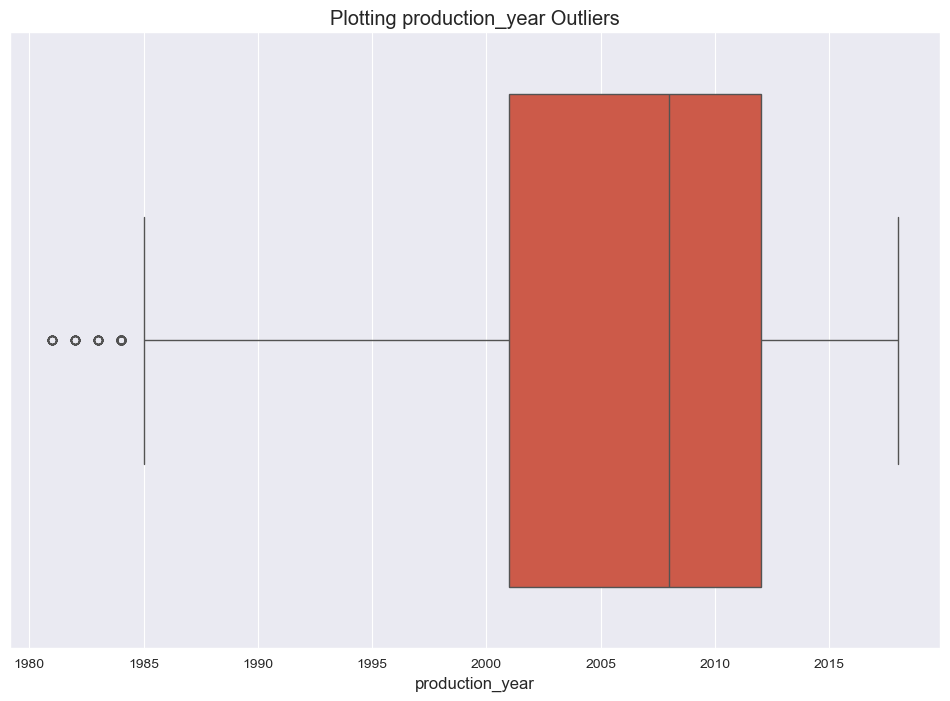

In [170]:
#plot the model year boxplot 
boxplot(df,'production_year')

### Outliers Removal

In [173]:
#get the mileage whiskers 
mileage_upper,mileage_lower = detect_outliers(df,'mileage')
#get the model whiskers 
myear_upper,myear_lower = detect_outliers(df,'production_year')

In [175]:
# Remove the mileage outliers for in the dataset
df = df[(df['mileage'] > mileage_lower) & (df['mileage'] < mileage_upper)]
# Then remove model year outliers from it  
df = df[(df['production_year'] > 1990) & (df['production_year'] < myear_upper)]
# For the fiscal power we will be romoving all values equal or above 20 
df = df[df.fiscal_power<=20]

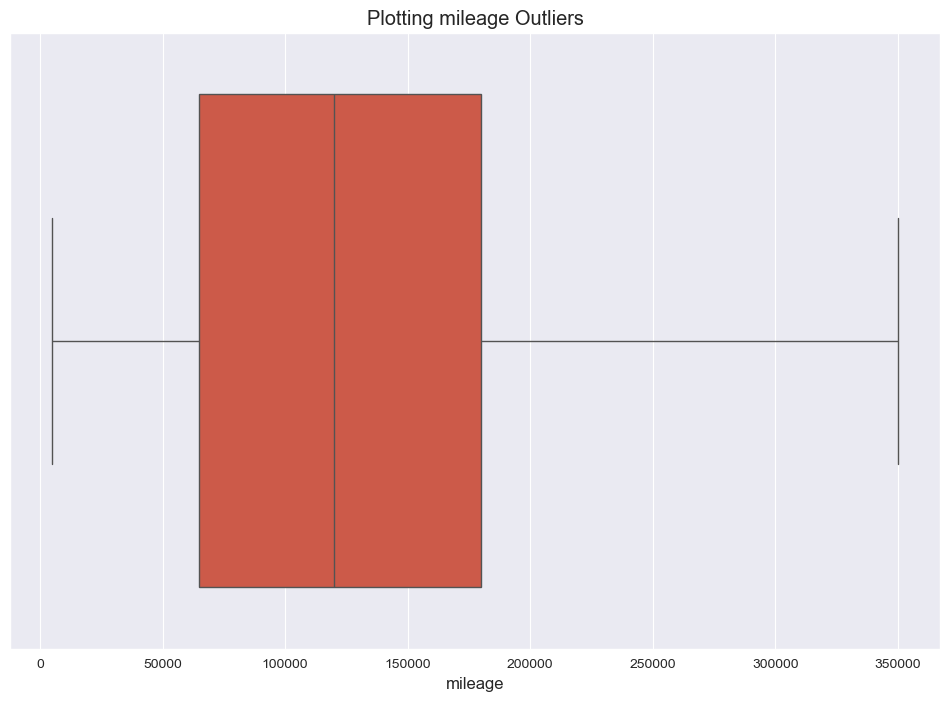

In [177]:
boxplot(df,'mileage')

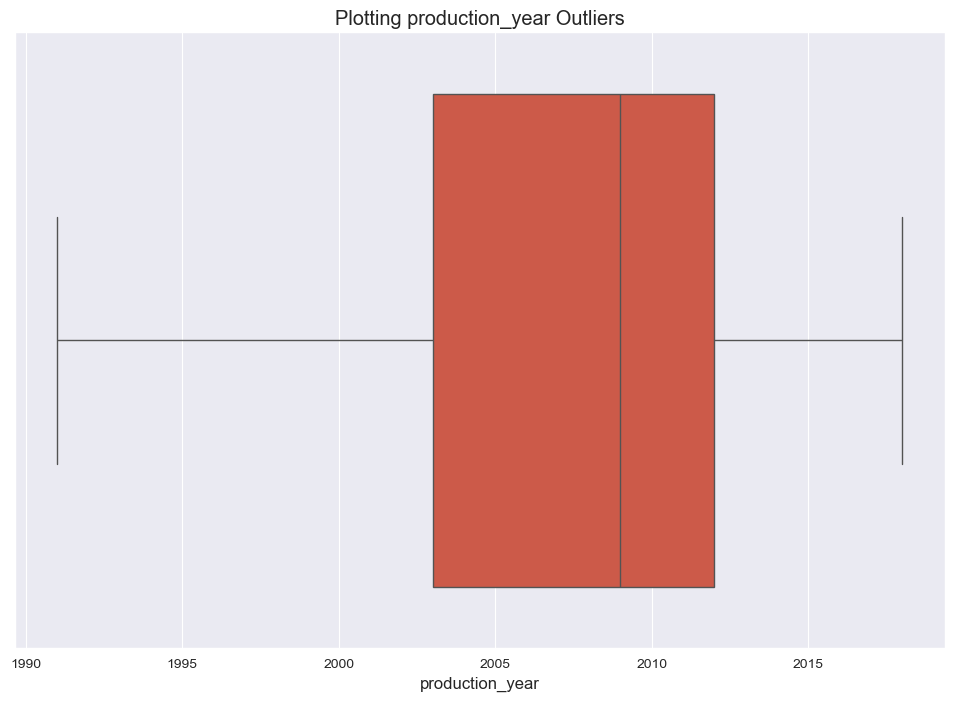

In [179]:
boxplot(df,'production_year')

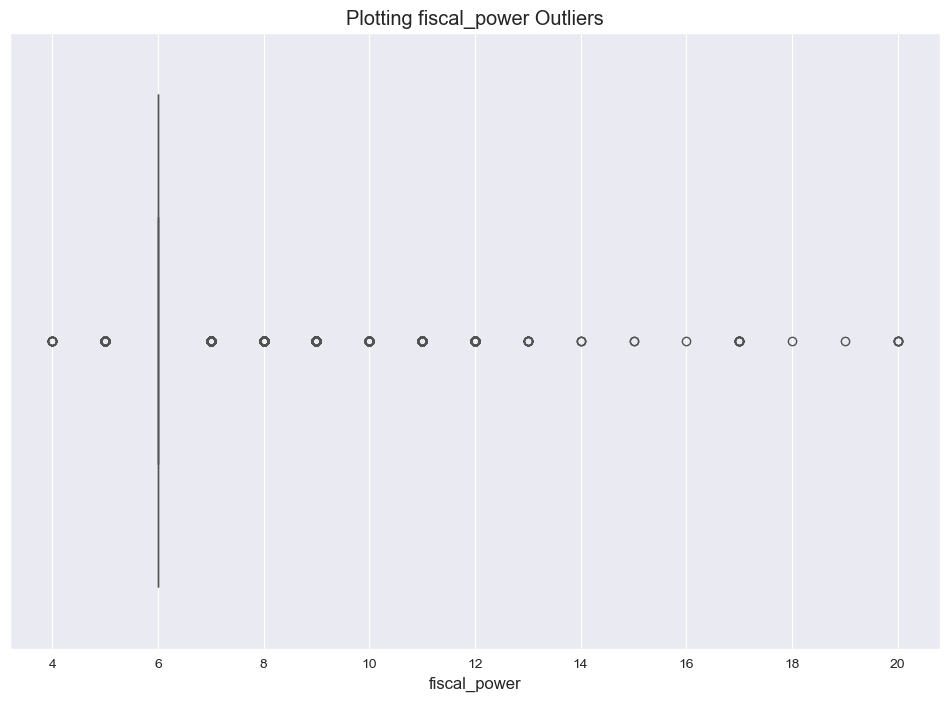

In [181]:
boxplot(df,'fiscal_power')

In [185]:
# Save preprocessed data 
df.to_csv("../data/preprocessed_used_cars.csv", index=False)

In [187]:
# END OF PROCESSING DATA